# Investigating the Rio+20 dataset

This investigation will provide insight into collected responses on four games played by students in the year of 2018

## Fixture to investigate the dataset

In [11]:
from activreader import Activ
from matplotlib import pyplot as plt
from datastructure import Sample
from datavisitor import Visitor


class Rio20Investigate:
    def __init__(self, pic_file="sample.dat"):
        self.start = 2
        self.games = {}
        self.selector = 'tol'
        self.trials = {}
        self.goals = {}
        self.moves = {}
        self.move_string = {}
        self.mark_string = {}
        self.mark_digest = set()
        self.activ_reader = activ_reader = Activ()
        self.sample = None
        try:
            with open(pic_file, "rb") as pkf:
                import pickle
                self.sample = pickle.load(pkf)
        except IOError as _:
            self.sample = Sample(sample=[activ_reader.one_player(player) for player in self.sample_stream])
        self.visitor = Visitor(
            leaf_action=dict(game=self.count_game_play, goal=self.count_trials, trial=self.count_moves))
        
    def plot_stats(self, x, xticks, y, label="number of participants", title="count"):
        # print("plot_stats", x, xticks, y, self.games)
        fig = plt.figure(figsize=(16,9))
        # plt.rcParams['figure.figsize'] = (9,9)
        rotate = max(len(str(xt)) for xt in xticks)
        xticks = tuple(xt[:9] + str(len(xt)) if len(str(xt)) > 9 else xt for xt in xticks)
        plt.xticks(rotation=90) if rotate > 4 else None     
        plt.xticks(x, xticks)
        fig.suptitle(title)
        plt.ylabel(label)
        _ = plt.bar(x, y)
        _ = plt.show()
                               
    def plot_goals(self):
        goals = sorted(self.goals.items())
        self.plot_stats(range(len(self.goals)), *zip(*goals), label="number of users per goals count", title='goals')
        return self
                               
    def plot_trials(self):
        trials = sorted(self.trials.items())
        self.plot_stats(range(len(self.trials)), *zip(*trials), label="number of users per trial count", title='Trials')
        return self
                               
    def plot_moves(self, moves=None):
        moves = moves or self.moves
        lim = min(64, len(moves))
        moves = sorted(moves.items())[self.start:lim]
        self.plot_stats(range(self.start, lim), *zip(*moves), label="number of users per move count", title='moves')
        return self
                               
    def _init(self):
        self.games = {}
        self.moves = {}
        self.move_string = {}
        self.mark_string = {}
        self.mark_digest = set()
        self.trials = {}
        self.goals = {}
        return self
                               
    def main(self, selector='tol', start=2):
        self._init()
        self.start = start
        self.selector = selector
        self.sample.visit(self.visitor)
        return self

    def count_goals(self, _, goal, **kwargs):
        # print("count_game_play", game, goal, name)
        n_trials = len(goal)
        self.goals.update({n_trials: self.goals.setdefault(n_trials, 0)+1})
        return True

    def count_trials(self, _, trial, **kwargs):
        # print("count_game_play", game, goal, name)
        n_trials = len(trial)
        self.trials.update({n_trials: self.trials.setdefault(n_trials, 0)+1})
        return True

    def count_moves(self, _, moves, **kwargs):
        # print("count_game_play", game, goal, name)
        def filter(marker):
            mk = marker.split(":")
            return "".join(m[0] for m in mk if m)
        n_moves = len(moves)
        self.mark_digest.remove('I_N_I') if 'I_N_I' in self.mark_digest else None
        move_string = ''.join(str(move.house) for move in moves if str(move.house) in "hlbm")[:6]
        mark_string = ''.join(filter(str(move.marker)) for move in moves if str(move.marker) in self.mark_digest)
        shape_string = ''.join(filter(str(move.shape)) for move in moves if str(move.shape) in self.mark_digest)
        _ = [self.mark_digest.add( str(move.marker)) for move in moves if str(move.marker)]
        mark_string = mark_string or shape_string
        _ = [self.mark_digest.add( str(move.shape)) for move in moves if str(move.shape)]
        self.moves.update({n_moves: self.moves.setdefault(n_moves, 0)+1})
        self.move_string.update({move_string: self.move_string.setdefault(move_string, 0)+1}) if move_string else None
        self.mark_string.update({mark_string: self.mark_string.setdefault(mark_string, 0)+1}) if mark_string else None
        return False

    def count_game_play(self, game, goal, name, **kwargs):
        # print("count_game_play", game, goal, name)
        if name == self.selector:
            self.games.update({name: self.games.setdefault(name, 0)+1})
            self.count_goals(game, goal=goal)
            return True
        return False

rio = Rio20Investigate()


# Tower of London 

## Participants and move rates

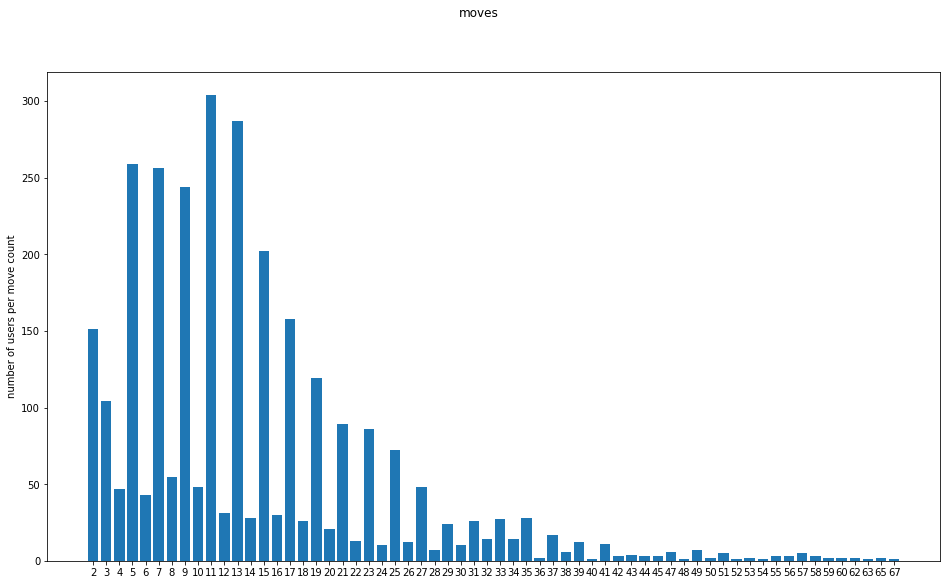

In [12]:
rio = rio.main(start=2)
_ = rio.plot_moves()
move = sorted([(mc, ms) for ms, mc in rio.move_string.items() if (mc > 1) and (len(ms) == 6)], reverse=True)
# mark = sorted([(mc, ms) for ms, mc in rio.mark_string.items() if (mc > 1) and (len(ms) == 6)], reverse=True)


## Participants and move patterns

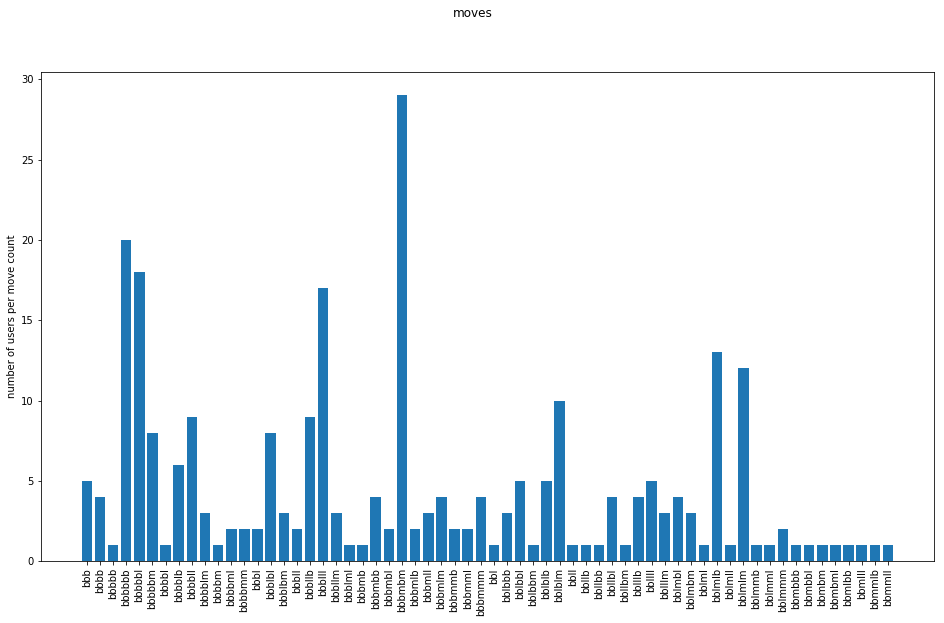

In [13]:
_ = rio.plot_moves(rio.move_string)


## Count of user attempting a given number of trials

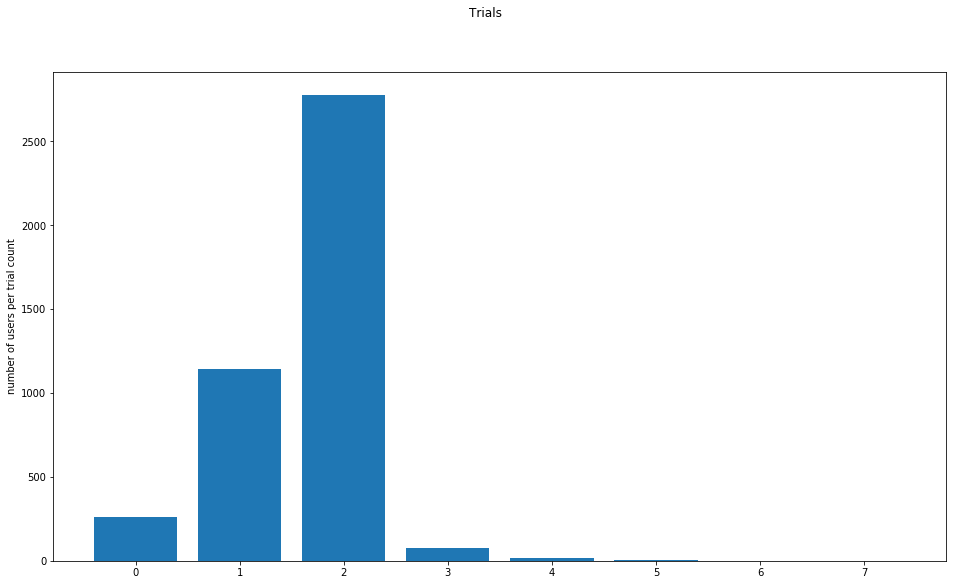

In [14]:
_ = rio.plot_trials()

## Count of user attempting a given number of goals

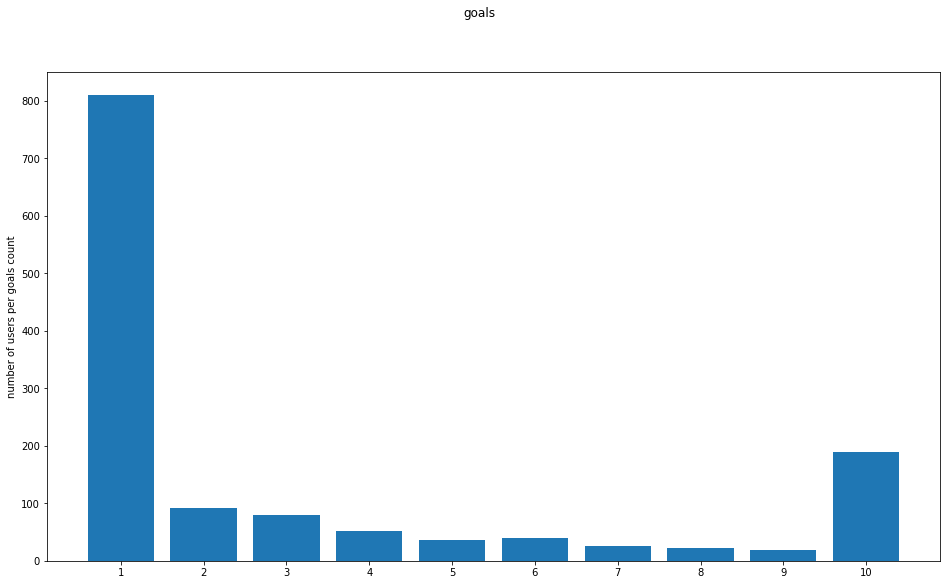

In [15]:
_ = rio.plot_goals()

# Train Manouvering

## Count of user using a given number of moves

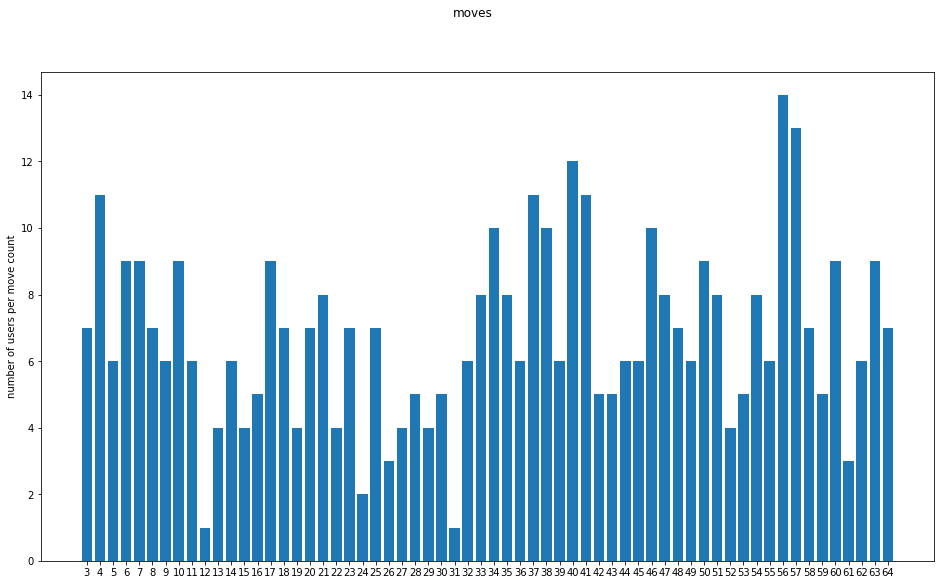

In [16]:
rio = rio.main(selector="trainz", start=2)
_ = rio.plot_moves()


## Sequences of train positioning patterns

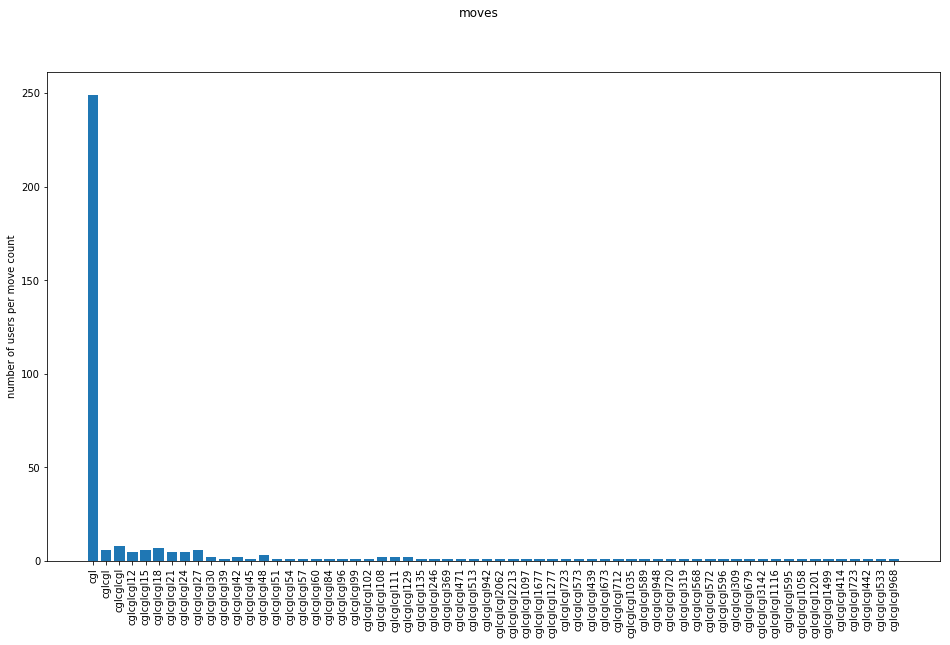

In [17]:
rio = rio.main(selector="trainz", start=2)
_ = rio.plot_moves(rio.mark_string)

## Count of users attempting a given number of trials

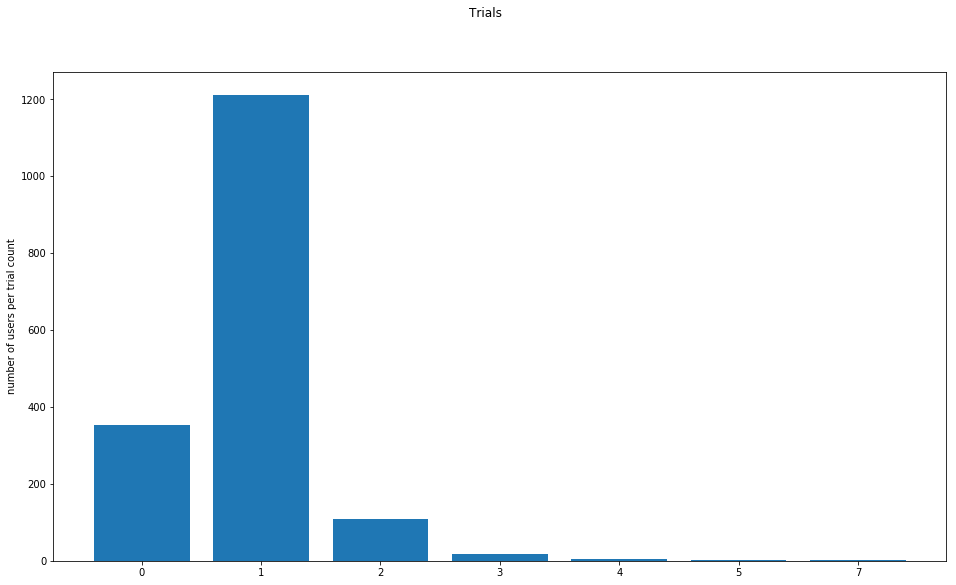

In [18]:
_ = rio.plot_trials()

# Wisconsin Card Test

## Count of users displaying a certain sequence of moves

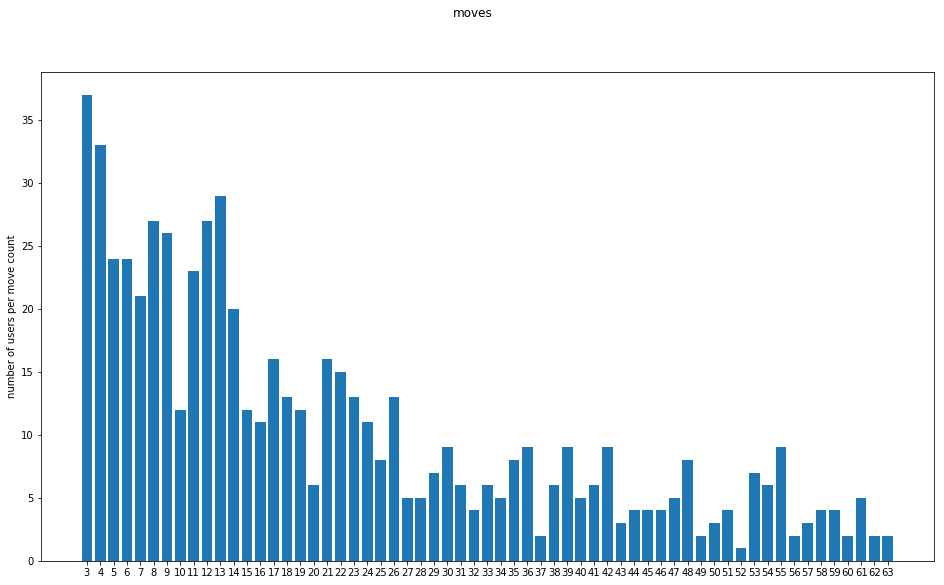

In [19]:
rio = rio.main(selector="wisconsin", start=3)
_ = rio.plot_moves()
# print(rio.mark_digest)


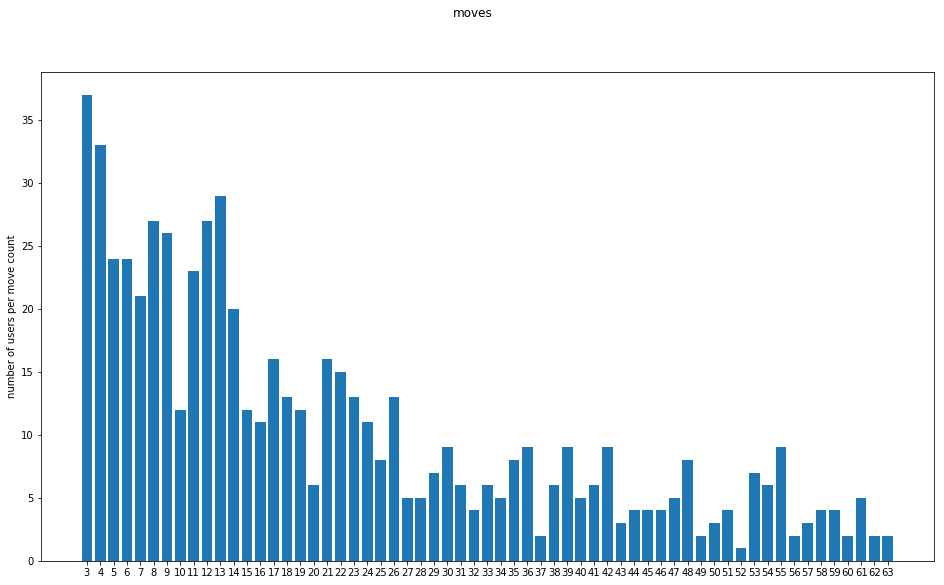

In [20]:
_ = rio.plot_moves(rio.mark_string)

# Topological Trail

## Count of users displaying a given number of moves

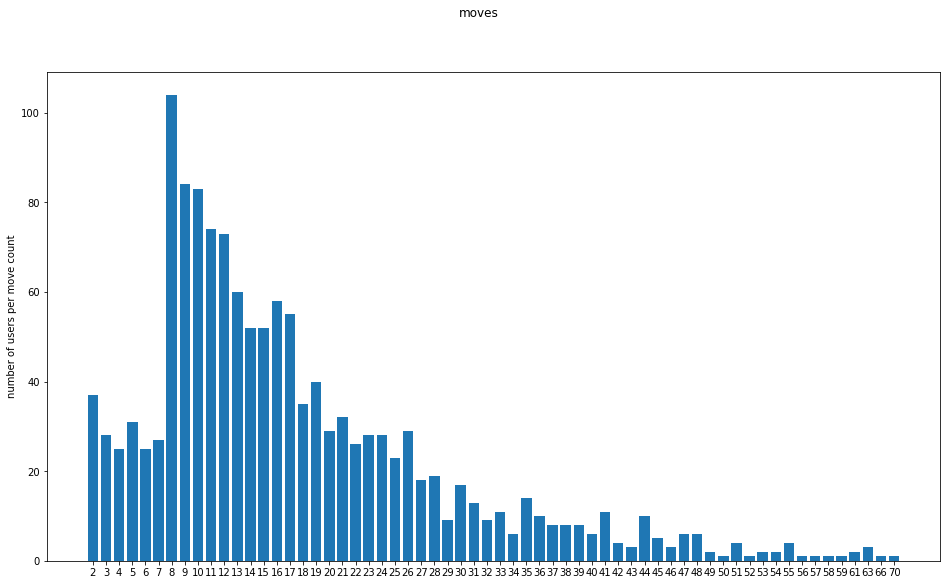

In [21]:
rio = rio.main(selector="trilha", start=2)
_ = rio.plot_moves()
# print(rio.mark_digest)


## Count of user attempting a given number of trials

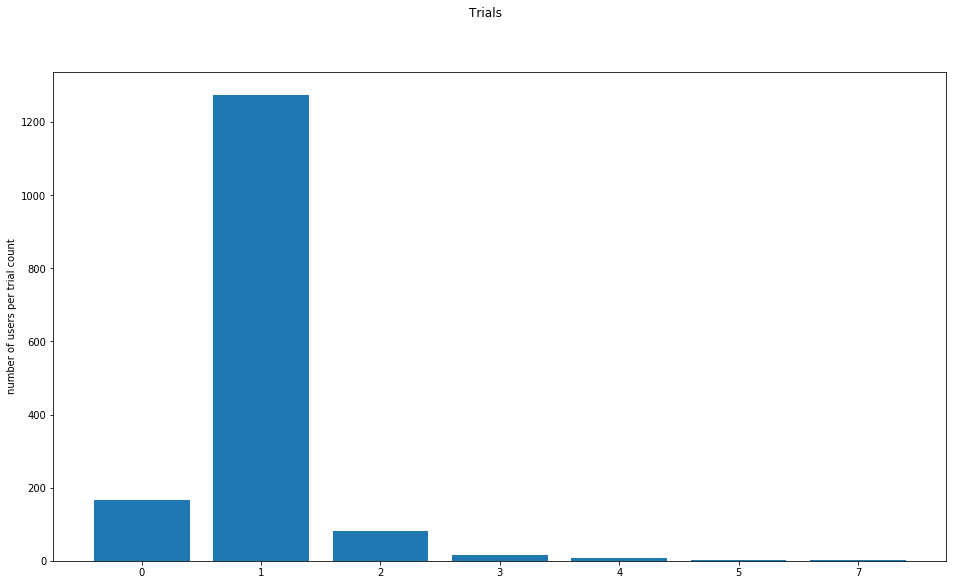

In [22]:
_ = rio.plot_trials()

## Count of users displaying a certain sequence of moves

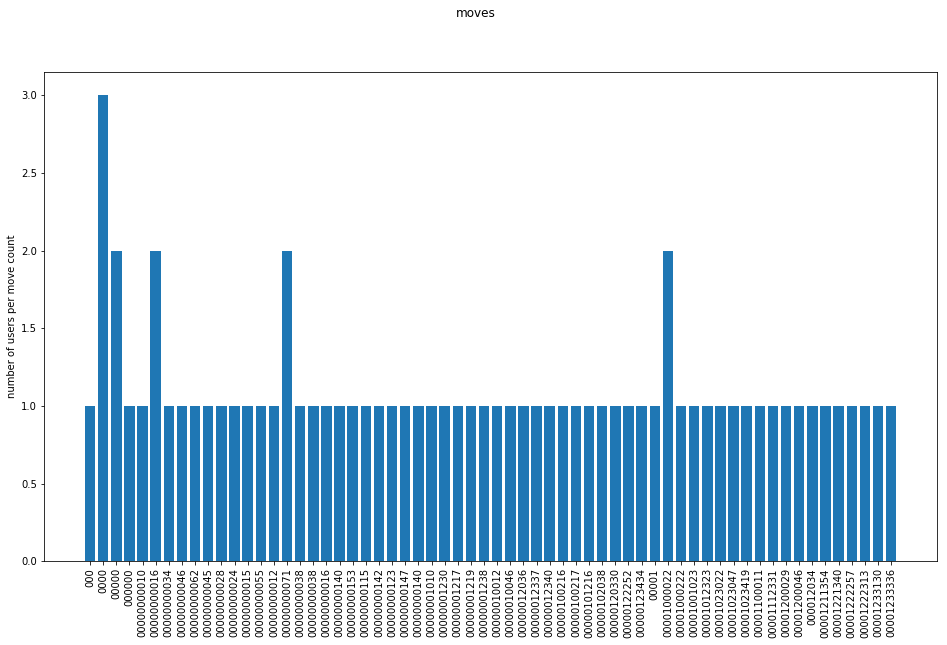

In [23]:
_ = rio.plot_moves(rio.mark_string)

# Teste do Cancelamento

## Count of users displaying a certain sequence of moves

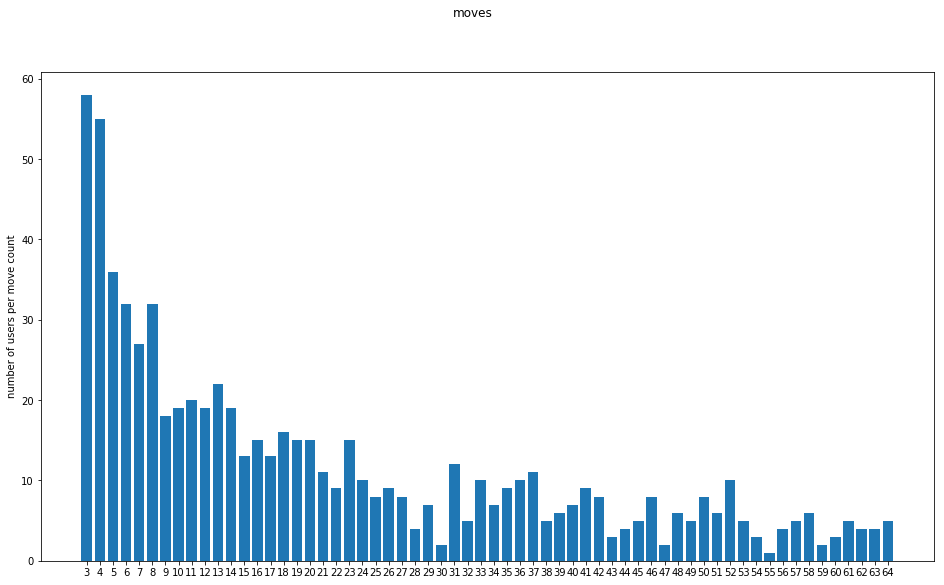

In [26]:
rio = rio.main(selector="cancel", start=2)
_ = rio.plot_moves()
# print(rio.mark_digest)



## Count of users atempting a number of trials

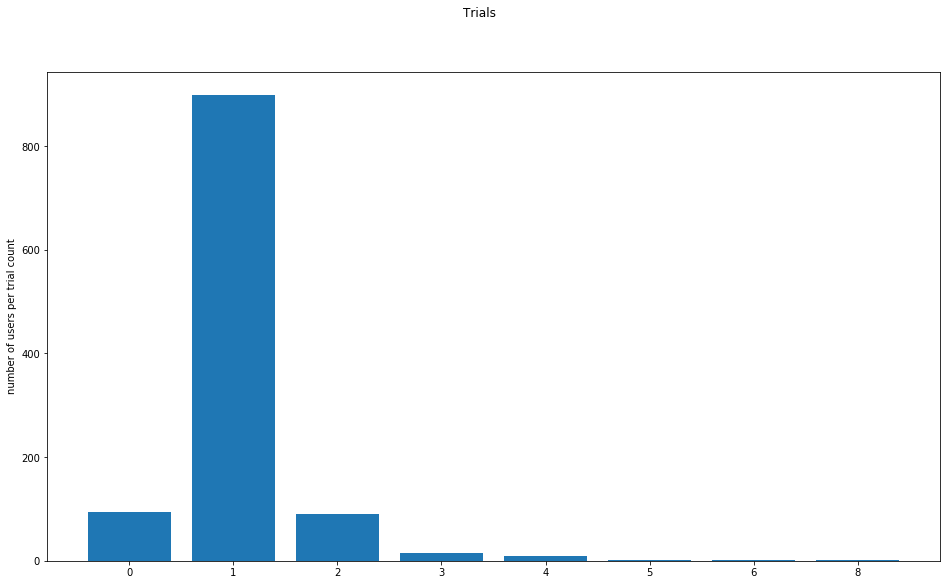

In [27]:
_ = rio.plot_trials()